In [2]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import yaml
import glob
import json
from scipy import stats
from mayavi import mlab
from check import ROI
import os
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors
import seaborn

resolution = .5
cubes_per_axis = int((ROI)/resolution)
frames = len(os.listdir('./b_2/0_datacollected_2019-28-02-22-02/'))

f=open(r'/home/akhildb/lidar_optimisation/config.yml')
config=yaml.load(f,Loader=yaml.FullLoader)
cube_resolution = config['cube_resolution']
total_cubes = (ROI*ROI)/np.prod(cube_resolution)


bb_classes = codecs.open('./b_2/bb_classes_2.txt', 'r', encoding='utf-8').read()
A = json.loads(bb_classes)

bikes = []
cars = []
for x in A:
    if(x[0]=='b'):
        bikes.append(x[1])
    else:
        cars.append(x[1])

In [3]:
x = np.linspace(-ROI/2,ROI/2,cubes_per_axis)
y = np.linspace(-ROI/2,ROI/2,cubes_per_axis)
z = np.linspace(-3.5,0.5,cubes_per_axis)

C=[]
B=[]
for i in range(len(cars)):
    for j in range(8):
        C.append((cars[i][j]))
        if(i<len(bikes)):
            B.append((bikes[i][j]))

In [4]:
q_x = np.digitize([a[0] for a in C],x)
q_y = np.digitize([a[1] for a in C],y)
q_z = np.digitize([a[2] for a in C],z)

Mc = np.zeros((cubes_per_axis+1,cubes_per_axis+1,cubes_per_axis+1))
for i in range(int(len(q_x)/8)):
    x_coord = [q_x[8*i],q_x[8*i+1]]
    y_coord = [q_y[8*i],q_y[8*i+2]]
    z_coord = [q_z[8*i],q_y[8*i+5]]
    lis = [(m,n,p) for m in x_coord for n in y_coord for p in z_coord]
    min_x = min(lis)[0]
    max_x = max(lis)[0]
    min_y = min(lis, key = lambda t: t[1])[1]
    max_y = max(lis, key = lambda t: t[1])[1]
    min_z = min(lis, key = lambda t: t[2])[2]
    max_z = max(lis, key = lambda t: t[2])[2]
    inside = [(g,h,l) for g in range(min_x,max_x+1) for h in range(min_y,max_y+1) for l in range(min_z,max_z+1)]
    for p in inside:
        a = p[0]
        b = p[1]
        c = p[2]
        Mc[a,b,c] = Mc[a,b,c] + 1
        
Mc[30:90,58:68,:] = 0
Mc = Mc/frames
# plt.figure(dpi=100)
# axc = seaborn.heatmap(Mc,cmap="YlGnBu",vmin=np.min(Mc),vmax=np.max(Mc),xticklabels=25, yticklabels=25)
# plt.title('Cars : Heatmap of ROI')
# plt.show()

# x = np.linspace(-ROI/2,ROI/2,cubes_per_axis)
# y = np.linspace(-ROI/2,ROI/2,cubes_per_axis)

# q_x = np.digitize([a[0] for a in B],x)
# q_y = np.digitize([a[1] for a in B],y)

# Mb = np.zeros((cubes_per_axis+1,cubes_per_axis+1))
# for i in range(int(len(q_x)/8)):
#     x = [q_x[8*i],q_x[8*i+1]]
#     y = [q_y[8*i],q_y[8*i+2]]
#     lis = [(m,n) for m in x for n in y]
#     min_x = min(lis)[0]
#     max_x = max(lis)[0]
#     min_y = min(lis, key = lambda t: t[1])[1]
#     max_y = max(lis, key = lambda t: t[1])[1]
#     inside = [(x,y) for x in range(min_x,max_x+1) for y in range(min_y,max_y+1)]
#     for i in inside:
#         a = i[0]
#         b = i[1]
#         Mb[a,b] = Mb[a,b] + 1

# Mb[30:85,55:68] = 0
# Mb = Mb/frames        
# plt.figure(dpi=100)
# axc = seaborn.heatmap(Mb,cmap="YlGnBu",vmin=np.min(Mb),vmax=np.max(Mb),xticklabels=25, yticklabels=25)
# plt.title('Bikes : Heatmap of ROI')
# plt.show()

# import pandas as pd
# import re
# from collections import Counter

# chat = []
# dates = []
# with open('/home/akhildb/chat.txt', 'r') as file:
#     for line in file:
#         text = re.sub("[^0-9-]", "", line.replace('/','-'))
#         chat.append(text)
#         if(len(text)>5):
#             dates.append(text[:5])
# date,num = zip(*Counter(dates).items())
# avg = np.mean(list(num))
# fig = plt.figure(dpi=500)
# plt.plot(date,num,'r',linewidth=1.5)
# plt.ylabel('Texts')
# plt.xlabel('Date')
# ax = plt.gca()
# ax.fill_between(date,0,num,color='lightpink')
# [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i%14 != 0]
# plt.axhline(avg,xmin=date[0],xmax=date[-1],color='g',linestyle='--')
# plt.legend(['Number of texts','Average texts'])
# plt.show()
# fig.savefig('texts_dates.pdf',format='pdf')

In [5]:
from mayavi import mlab

mlab.clf()
x, y, z = np.mgrid[-5:5:64, -5:5:64j, -5:5:64j]
values = Mc
mlab.contour3d(values)
mlab.show()

In [6]:
l = len(Mc)
A = np.zeros((l,l))
for i in range(l):
    for j in range(l):
        A[i,j]=np.sum(Mc[i,:,j])
A = A/cubes_per_axis

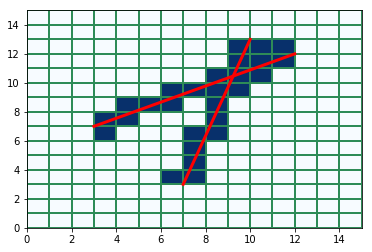

In [20]:
# fig = plt.figure(dpi=300)
n = 15
X,Y = np.mgrid[slice(0,n+1,1),slice(0,n+1,1)]
Z = np.zeros((n,n))
plt.pcolormesh(X,Y,Z,cmap="YlGnBu",edgecolor='seagreen')
B = np.zeros((n,n))
dist_max = 0.5*np.sqrt(2)
start = np.random.randint(n,size=(2,2))
end = np.random.randint(n,size=(2,2))
plt.plot([start[0,0],end[0,0]],[start[0,1],end[0,1]],'r-',linewidth=3)
plt.plot([start[1,0],end[1,0]],[start[1,1],end[1,1]],'r-',linewidth=3)
for s,e in zip(start,end):
    p1 = s
    p2 = e
    i=0
    j=0
    while(i<len(Z) and j<len(Z)):
        p3 = np.array([i+0.5,j+0.5])
        dist = np.linalg.norm(np.cross(p2-p1,p1-p3))/np.linalg.norm(p2-p1)
        if(dist<dist_max-1e-2 and np.dot((p3-p1),(p2-p3))>0):
            B[i,j]=1
        if(i<len(Z)-1):
            i=i+1
        else:
            i=0
            j=j+1
plt.pcolormesh(X,Y,B,cmap="Blues",edgecolor='seagreen')
plt.show()

In [8]:
C = 10*np.random.rand(n,n)

In [9]:
class ABC(object):

    def __init__(self, obj_function, colony_size=30, n_iter=5000, max_trials=100):
        self.colony_size = colony_size
        self.obj_function = obj_function

        self.n_iter = n_iter
        self.max_trials = max_trials

        self.optimal_solution = None
        self.optimality_tracking = []

    def __reset_algorithm(self):
        self.optimal_solution = None
        self.optimality_tracking = []

    def __update_optimality_tracking(self):
        self.optimality_tracking.append(self.optimal_solution.fitness)

    def __update_optimal_solution(self):
        n_optimal_solution = \
            min(self.onlokeer_bees + self.employee_bees,
                key=lambda bee: bee.fitness)
        if not self.optimal_solution:
            self.optimal_solution = deepcopy(n_optimal_solution)
        else:
            if n_optimal_solution.fitness < self.optimal_solution.fitness:
                self.optimal_solution = deepcopy(n_optimal_solution)

    def __initialize_employees(self):
        self.employee_bees = []
        for itr in range(self.colony_size // 2):
            self.employee_bees.append(EmployeeBee(self.obj_function))

    def __initialize_onlookers(self):
        self.onlokeer_bees = []
        for itr in range(self.colony_size // 2):
            self.onlokeer_bees.append(OnLookerBee(self.obj_function))

    def __employee_bees_phase(self):
        map(lambda bee: bee.explore(self.max_trials), self.employee_bees)

    def __calculate_probabilities(self):
        sum_fitness = sum(map(lambda bee: bee.get_fitness(), self.employee_bees))
        map(lambda bee: bee.compute_prob(sum_fitness), self.employee_bees)

    def __select_best_food_sources(self):
        self.best_food_sources =\
            filter(lambda bee: bee.prob > np.random.uniform(low=0, high=1),
                   self.employee_bees)
        while not self.best_food_sources:
            self.best_food_sources = \
                filter(lambda bee: bee.prob > np.random.uniform(low=0, high=1),
                       self.employee_bees)

    def __onlooker_bees_phase(self):
        map(lambda bee: bee.onlook(self.best_food_sources, self.max_trials),
            self.onlokeer_bees)

    def __scout_bees_phase(self):
        map(lambda bee: bee.reset_bee(self.max_trials),
            self.onlokeer_bees + self.employee_bees)

    def optimize(self):
        self.__reset_algorithm()
        self.__initialize_employees()
        self.__initialize_onlookers()
        for itr in range(self.n_iter):
            self.__employee_bees_phase()
            self.__update_optimal_solution()

            self.__calculate_probabilities()
            self.__select_best_food_sources()

            self.__onlooker_bees_phase()
            self.__scout_bees_phase()

            self.__update_optimal_solution()
            self.__update_optimality_tracking()
            print("iter: {} = cost: {}"
                  .format(itr, "%04.03e" % self.optimal_solution.fitness))